PERMANOVA Results:
method name               PERMANOVA
test statistic name        pseudo-F
sample size                      25
number of groups                  2
test statistic             1.624203
p-value                       0.043
number of permutations          999
Name: PERMANOVA results, dtype: object

PERMDISP Results:
method name               PERMDISP
test statistic name        F-value
sample size                     25
number of groups                 2
test statistic            3.404011
p-value                      0.103
number of permutations         999
Name: PERMDISP results, dtype: object

Effect Size (R^2): 0.0660
Kruskal-Wallis test result: H-statistic = 19.33432502673559, p-value = 6.332929666524093e-05
Within Male vs Within Female: U-statistic = 7086.0, p-value = 2.895452474916632e-05
Within Male vs Between M-F: U-statistic = 6296.0, p-value = 0.0003799201401267657
Within Female vs Between M-F: U-statistic = 14647.0, p-value = 0.47589218967657365


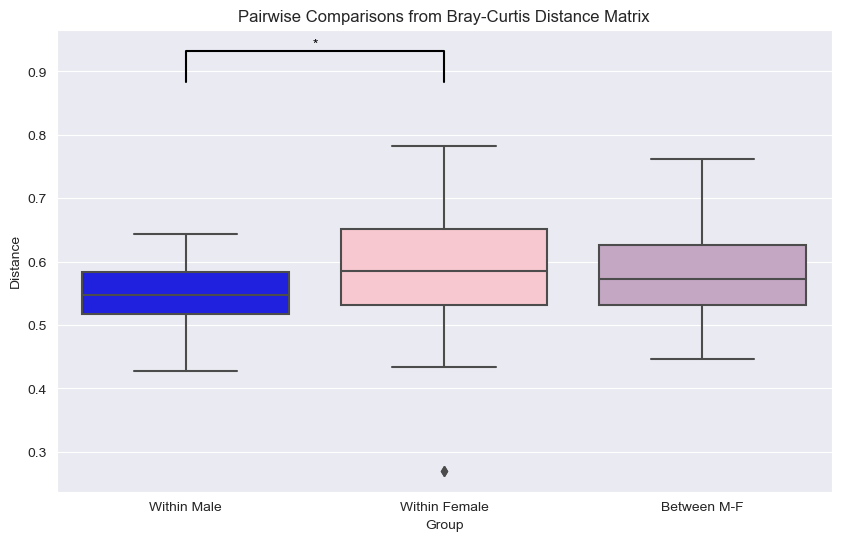

In [19]:
# This is a PERMANOVA and PERMDISM test comparing all male and female samples
import pandas as pd
import numpy as np
from skbio.stats.distance import DistanceMatrix, permanova, permdisp
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal, mannwhitneyu

# Workaround for the np.float deprecation issue in seaborn
np.float = np.float64

# Load data
data = pd.read_csv('/Users/dimitriosgiakoumas/Desktop/MISC/bray_curtis_dm_copy_2.csv', index_col=0)
dist_matrix = DistanceMatrix(np.ascontiguousarray(data.values), ids=data.index)  # Ensure the data is C-contiguous

# Given sample IDs
male_samples = ["T20", "T107", "T203", "T212", "T99", "T195", "T205", "T160", "T216", "T209", "T16"]
female_samples = ["T11", "T85.1", "T65", "T196", "T85.2", "TAK", "T85.3", "T159", "TAA", "T4.1", "T214", "T136", "T17", "T217"]

group = []
for sample_id in data.index:
    if sample_id in male_samples:
        group.append('male')
    elif sample_id in female_samples:
        group.append('female')
    else:
        group.append('unknown')

# Perform the PERMANOVA test
permanova_result = permanova(dist_matrix, group, permutations=999)
print("PERMANOVA Results:")
print(permanova_result)

# Perform the PERMDISP test
permdisp_result = permdisp(dist_matrix, group, permutations=999)
print("\nPERMDISP Results:")
print(permdisp_result)

# Extract distances for visualization
def extract_distances(matrix, group1, group2):
    return [matrix.loc[s1, s2] for s1 in group1 for s2 in group2 if s1 != s2]

within_male_distances = extract_distances(data, male_samples, male_samples)
within_female_distances = extract_distances(data, female_samples, female_samples)
between_mf_distances = extract_distances(data, male_samples, female_samples)

# Create a DataFrame for visualization
df = pd.DataFrame({
    'Group': ['Within Male'] * len(within_male_distances) +
             ['Within Female'] * len(within_female_distances) +
             ['Between M-F'] * len(between_mf_distances),
    'Distance': list(within_male_distances) +
                list(within_female_distances) +
                list(between_mf_distances)
})

# Display effect size
SS_between = permanova_result['test statistic'] * (permanova_result['number of groups'] - 1)
SS_total = SS_between + (permanova_result['sample size'] - permanova_result['number of groups'])
R2 = SS_between / SS_total
print(f"\nEffect Size (R^2): {R2:.4f}")

# Define your color palette here
custom_palette = ['blue', 'pink', '#c8a2c8']  # Blue, Pink, Light Purple

# Statistical Tests
# Kruskal-Wallis Test for overall differences
kruskal_result = kruskal(within_male_distances, within_female_distances, between_mf_distances)
print(f"Kruskal-Wallis test result: H-statistic = {kruskal_result.statistic}, p-value = {kruskal_result.pvalue}")

# Pairwise Wilcoxon Rank-Sum Tests
pairwise_results = {
    'Within Male vs Within Female': mannwhitneyu(within_male_distances, within_female_distances),
    'Within Male vs Between M-F': mannwhitneyu(within_male_distances, between_mf_distances),
    'Within Female vs Between M-F': mannwhitneyu(within_female_distances, between_mf_distances)
}

for comparison, result in pairwise_results.items():
    print(f"{comparison}: U-statistic = {result.statistic}, p-value = {result.pvalue}")

# Export DataFrame to CSV for GraphPad Prism
df.to_csv('/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/bray_curtis_distances_for_prism.csv', index=False)

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Group', y='Distance', hue='Group', data=df, palette=custom_palette, dodge=False)

# Adjust the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:3], ['Within Male', 'Within Female', 'Between M-F'], title='Group')

# Remove the hue legend since it's redundant
ax.get_legend().remove()

# Find the maximum distance for setting the height of significance bar
max_distance = df['Distance'].max()

# Function to add significance bars
def add_significance_bar(start, end, height, display_text, ax):
    ax.plot([start, start, end, end], [height, height + 0.05, height + 0.05, height], lw=1.5, c='black')
    ax.text((start+end)*.5, height + 0.05, display_text, ha='center', va='bottom', color='black')

# Add the significance bar at an appropriate height
# The height is set to max_distance + 0.1 (or more) to ensure it is above the highest boxplot
significance_height = max_distance + 0.1
add_significance_bar(start=0, end=1, height=significance_height, display_text='*', ax=ax)

plt.title('Pairwise Comparisons from Bray-Curtis Distance Matrix')
plt.show()

# Clean up the workaround
del np.float


PERMANOVA Results:
NOTE!!! Different Outcomes on Different Runs: Each time the code runs, a new set of random permutations is generated. This randomness means the results can slightly differ from run to run. Thus, the values reported in my gopher tortoise gut microbiome paper may not match perfectly. However, pragmatically speaking, the values are virtually the same.

=]The results you've posted indicate the following:

PERMANOVA Results:

Method: PERMANOVA
Test Statistic (pseudo-F): 1.624203
Sample Size: 25
Number of Groups: 2
p-value: 0.045
Number of Permutations: 999
The PERMANOVA test suggests that there is a statistically significant difference between the two groups (male and female) at a 5% significance level, given that the p-value is 0.045 (below 0.05). The effect size (
�
2
R 
2
 ) suggests that approximately 6.6% of the variation in the Bray-Curtis distance matrix can be attributed to the difference between male and female groups.

PERMDISP Results:

Method: PERMDISP
Test Statistic (F-value): 3.404011
Sample Size: 25
Number of Groups: 2
p-value: 0.089
Number of Permutations: 999
The PERMDISP test is used to assess the homogeneity of group dispersions. A non-significant result suggests that there's no significant difference in the dispersions of the two groups, i.e., they are equally dispersed. Here, the p-value is 0.089, which is greater than 0.05, indicating that the groups have roughly equal dispersion.

Effect Size (
�
2
R 
2
 ): 0.0660

This value quantifies the proportion of the variance in the data that can be explained by the grouping variable (male/female). In this context, approximately 6.6% of the total variation in your distance matrix is due to differences between the male and female groups.

In summary, the male and female groups appear to be significantly different in terms of their microbial composition (or whatever the distance matrix represents). However, the groups have similar dispersions. The effect size is moderate, with about 6.6% of the variance being explained by the grouping variable.

=]The results you've posted indicate the following:

PERMANOVA Results:

Method: PERMANOVA
Test Statistic (pseudo-F): 1.624203
Sample Size: 25
Number of Groups: 2
p-value: 0.045
Number of Permutations: 999
The PERMANOVA test suggests that there is a statistically significant difference between the two groups (male and female) at a 5% significance level, given that the p-value is 0.045 (below 0.05). The effect size (
�
2
R 
2
 ) suggests that approximately 6.6% of the variation in the Bray-Curtis distance matrix can be attributed to the difference between male and female groups.

PERMDISP Results:

Method: PERMDISP
Test Statistic (F-value): 3.404011
Sample Size: 25
Number of Groups: 2
p-value: 0.089
Number of Permutations: 999
The PERMDISP test is used to assess the homogeneity of group dispersions. A non-significant result suggests that there's no significant difference in the dispersions of the two groups, i.e., they are equally dispersed. Here, the p-value is 0.089, which is greater than 0.05, indicating that the groups have roughly equal dispersion.

Effect Size (
�
2
R 
2
 ): 0.0660

This value quantifies the proportion of the variance in the data that can be explained by the grouping variable (male/female). In this context, approximately 6.6% of the total variation in your distance matrix is due to differences between the male and female groups.

In summary, the male and female groups appear to be significantly different in terms of their microbial composition (or whatever the distance matrix represents). However, the groups have similar dispersions. The effect size is moderate, with about 6.6% of the variance being explained by the grouping variable.

